In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq, rfftfreq


In [2]:
def gaus(x,A,b,c):
    return A*np.exp( - ( x-b)**2/(2*c**2))

def convgaus(x,A,t0,T,s,offset):
    return A*np.exp(-(x-t0)/T)*np.exp( -(x-t0)**2/(2*s**2)) + offset

def errfunc(x, a, b, z, f):
    return a * scipy.special.erf((x - z)*f) + b


<ErrorbarContainer object of 3 artists>

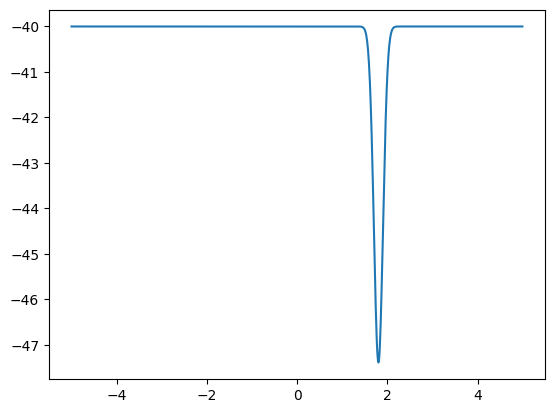

In [3]:
x=np.arange(-5,5,0.01)

y=convgaus(x,-1,2,0.05,0.1,-40)

plt.errorbar(x,y)

In [4]:


filelist=glob.glob('./data/20230922-*.csv')

DFs=[]
lasercur=[22.0,22.5,23.0,23.5,24.0,24.5,25.0,25.5]
for i,file in enumerate(filelist):


    DF=pd.read_csv(file,skiprows=[1])
    DFs.append(DF)
    


In [5]:
f=open(file)
print(f.readlines())

f.close()

['Time,Channel B,Channel C\n', '(us),(V),(V)\n', '\n', '-1.00000000,0.00000000,0.00000000\n', '-0.99800000,0.00000000,0.00000000\n', '-0.99600000,-0.04321481,0.00000000\n', '-0.99400000,0.00000000,0.00000000\n', '-0.99200000,0.00000000,0.00000000\n', '-0.99000000,0.00000000,0.00000000\n', '-0.98800000,0.00000000,0.00000000\n', '-0.98600000,-0.04321481,0.00000000\n', '-0.98400000,0.00000000,0.00000000\n', '-0.98200000,0.00000000,0.00000000\n', '-0.98000000,0.00000000,0.00000000\n', '-0.97800000,0.00000000,0.00000000\n', '-0.97600000,0.00000000,0.00000000\n', '-0.97400000,0.00000000,0.00000000\n', '-0.97200000,0.00000000,0.00000000\n', '-0.97000000,0.00000000,0.00000000\n', '-0.96800000,0.00000000,0.00000000\n', '-0.96600000,0.00000000,0.00000000\n', '-0.96400000,0.00000000,0.00000000\n', '-0.96200000,0.00000000,0.00000000\n', '-0.96000000,0.00000000,0.00000000\n', '-0.95800000,0.00000000,0.00000000\n', '-0.95600000,0.00000000,0.00000000\n', '-0.95400000,-0.04321481,0.00000000\n', '-0.95

Text(0.5, 0, 'Time(us)')

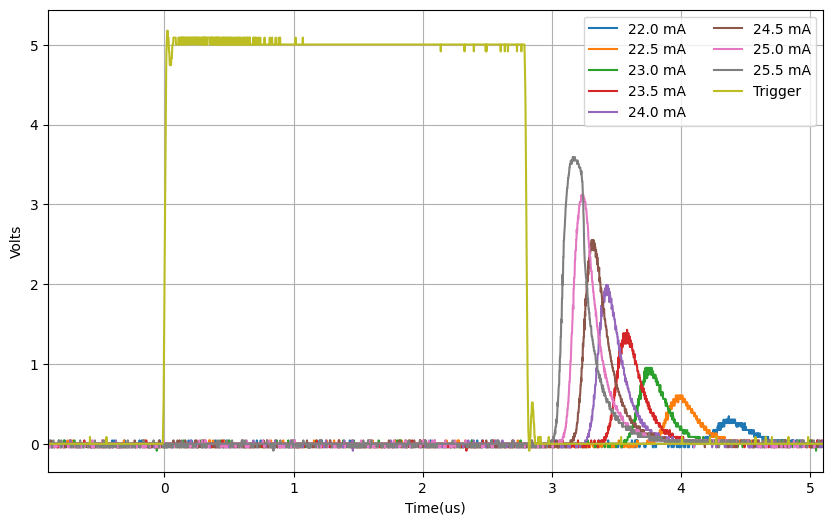

In [6]:


fig, plots = plt.subplots(1, 1, figsize=(10,6))



for i,DF in enumerate(DFs):

    plt.errorbar(DF["Time"],y=DF["Channel B"],label="%.1f mA"%(lasercur[i]))


plt.errorbar(DFs[0]["Time"],DFs[0]["Channel C"],label="Trigger")
plt.legend(ncol=2)

plt.grid()
plt.xlim(-0.9,5.1)


plt.ylabel("Volts")
plt.xlabel("Time(us)")


In [7]:
Df=pd.read_csv("Data/ALL0001.CSV",skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],index_col=False,names=["T1","C1","T2","C2","T3","C3"])

In [8]:
Df

,T1,C1,T2,C2,T3,C3
0,-0.000003,-0.76,-0.000003,0.00,-0.000003,0.2
1,-0.000002,-0.72,-0.000002,-0.04,-0.000002,0.2
2,-0.000002,-0.72,-0.000002,0.00,-0.000002,0.2
3,-0.000002,-0.72,-0.000002,-0.04,-0.000002,0.2
4,-0.000002,-0.76,-0.000002,0.00,-0.000002,0.2
...,...,...,...,...,...,...
4995,0.000002,0.76,0.000002,-0.04,0.000002,0.0
4996,0.000002,0.80,0.000002,0.00,0.000002,0.0
4997,0.000002,0.76,0.000002,-0.04,0.000002,0.0
4998,0.000002,0.80,0.000002,0.00,0.000002,-0.2


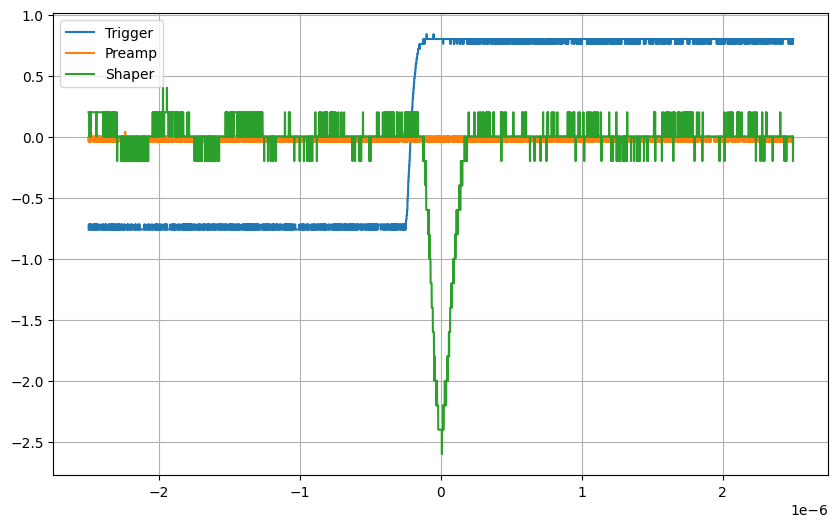

In [9]:
Df=pd.read_csv("Data/ALL0001.CSV",
               skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
               index_col=False,names=["T1","C1","T2","C2","T3","C3"])


fig, plots = plt.subplots(1, 1, figsize=(10,6))


plt.errorbar(x=Df["T1"],y=Df["C1"],label="Trigger")
plt.errorbar(x=Df["T2"],y=Df["C2"],label="Preamp")
plt.errorbar(x=Df["T3"],y=Df["C3"],label="Shaper")

plt.grid("True")
plt.legend()

C:\Users\EXO_Lab1\AppData\Local\Temp\ipykernel_20120\533327546.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Df=pd.read_csv("Data/ALL0005.CSV",
C:\Users\EXO_Lab1\AppData\Local\Temp\ipykernel_20120\533327546.py:15: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Df=pd.read_csv("Data/ALL0004.CSV",


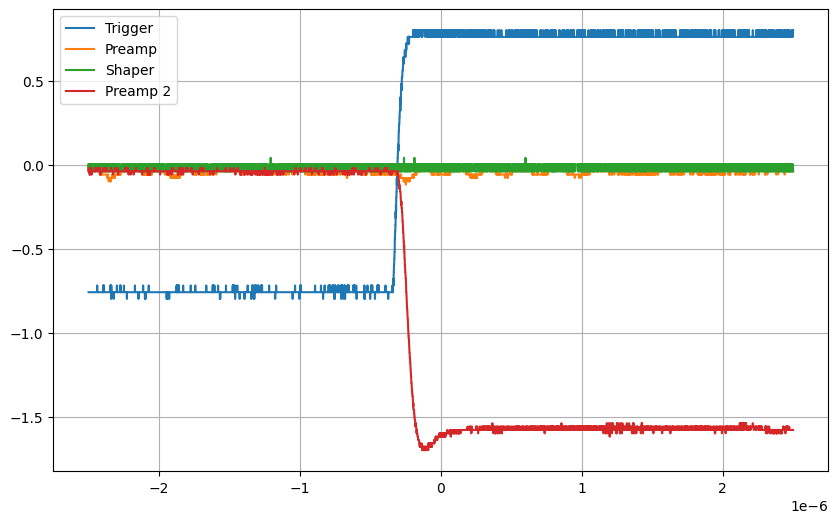

In [10]:
Df=pd.read_csv("Data/ALL0005.CSV",
               skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
               index_col=False,names=["T1","C1","T2","C2","T3","C3"])


fig, plots = plt.subplots(1, 1, figsize=(10,6))


plt.errorbar(x=Df["T1"],y=Df["C1"],label="Trigger")
plt.errorbar(x=Df["T2"],y=Df["C2"],label="Preamp")
plt.errorbar(x=Df["T3"],y=Df["C3"],label="Shaper")



Df=pd.read_csv("Data/ALL0004.CSV",
               skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
               index_col=False,names=["T1","C1","T2","C2","T3","C3"])


#fig, plots = plt.subplots(1, 1, figsize=(10,6))


#plt.errorbar(x=Df["T1"],y=Df["C1"],label="Trigger")
plt.errorbar(x=Df["T2"],y=Df["C2"],label="Preamp 2")
#plt.errorbar(x=Df["T3"],y=Df["C3"],label="Shaper")


plt.grid("True")
plt.legend()

4.54
2.38
0.78
0.206


Text(0.5, 0, 'Time')

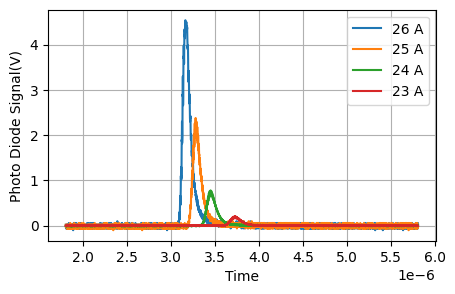

In [11]:
filename="./data/tek0004ALL.csv"
fig, plots = plt.subplots(1, 1, figsize=(5,3))

flist = glob.glob("./data/tek000?ALL.csv")
curlist = [26,25,24,23]

for i,filename in enumerate(flist):

    Df=pd.read_csv(filename,
               skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
               index_col=False,names=["T1","C1","C2"])

    print(max(Df["C2"]))

    #if i == 0:
    #    plt.errorbar(x=Df["T1"],y=Df["C1"],label="Trigger")

    plt.errorbar(x=Df["T1"],y=Df["C2"],label="%i A"%(curlist[i]))
    

plt.legend()
plt.grid()
plt.ylabel("Photo Diode Signal(V)")
plt.xlabel("Time")




In [12]:
Df

,T1,C1,C2
0,0.000002,2.42,-0.002
1,0.000002,2.42,0.002
2,0.000002,2.42,0.006
3,0.000002,2.42,-0.002
4,0.000002,2.42,-0.002
...,...,...,...
9995,0.000006,2.42,-0.006
9996,0.000006,2.42,-0.002
9997,0.000006,2.42,0.002
9998,0.000006,2.42,0.002


In [13]:
file_list[0]
waveforms=[]
with open(file_list[0]) as csvfile:
    waveform = list(csv.reader(csvfile))
    waveforms.append(waveform)

with open(file_list[1]) as csvfile:
    waveform = list(csv.reader(csvfile))
    waveforms.append(waveform)


print(waveforms[1][3],"\n",waveforms[0][3])

avg=np.average(waveforms,axis=0)

print(avg)


NameError: name 'file_list' is not defined

In [53]:
def is_convertible_to_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

In [57]:

waveform_date=20231110
waveform_path="./data/waveforms/%s"%(str(waveform_date))



Runs=[]
#def grab_waveform_avg(base_name=name,):
if 1==1:
    print(waveform_path)
    dirlist = glob.glob(waveform_path+"/*")
    for  dir in dirlist:
        subname= dir.replace(waveform_path,"")
        subname=subname.replace("\\","")
        subname=subname.replace(str(waveform_date),"")
        subname=subname.replace("-L","L")
        
        CPos=subname.find("C")
        CathPot=subname[CPos+1:subname.find("-",CPos)]

        GPos=subname.find("G")
        GridPot=subname[GPos+1:subname.find("-",GPos)]
        
        APos=subname.find("A")
        AnodePot=subname[APos+1:len(subname)]
        if not is_convertible_to_int(AnodePot):
            AnodePot=AnodePot[:AnodePot.find("-")]
        
        LPos=subname.find("L")
        LaserCur=subname[LPos+1:subname.find("-",LPos)]
        LaserCur=LaserCur.replace("_",".")



        Voltags=[CathPot,GridPot,AnodePot]

        #Build up file name from the base name and path

        #print(waveform_path)
        file_base=waveform_path+"/"+str(waveform_date)+"-"+subname

        #print(file_base)
        file_list= glob.glob(file_base+"/*.csv")

        #print("list\n",file_list)
        #prepare list for each channel for every waveform
        waveforms=[]
        ChAs=[] 
        ChBs=[]
        ChCs=[]
        Times=[]
        print(file_base)
        if len(file_list)<0:
            print("No files found")
            break
    #        return 0

        #Loop through each file(waveform) 
        for file in file_list:
            
            waveform=pd.read_csv(file,skiprows=[1,2])#Read in the csv info into datafram
            
            #Grab each column and build 2D array with time steps for each channel then appended through each waveform
            Times.append(np.array(waveform["Time"]))
            ChAs.append(np.array(waveform["Channel A"]))
            ChBs.append(np.array(waveform["Channel B"]))
            ChCs.append(np.array(waveform["Channel C"]))
        
        #average each channel
        Time=np.average(Times, axis=0)
        ChA=np.average(ChAs, axis=0)*1000
        ChB=np.average(ChBs, axis=0)
        ChC=np.average(ChCs, axis=0)

        waveform_dict={}
        waveform_dict["Time"]=Time
        waveform_dict["Pickoff"]=ChA
        waveform_dict["PreAmp"]=ChB
        waveform_dict["Shaper"]=ChC

        waveform_dict["LaserCur"]=LaserCur
        waveform_dict["Cathode"]=int(Voltags[0])
        waveform_dict["Grid"]   =int(Voltags[1])
        print("Volts =",Voltags[2])
        waveform_dict["Anode"]  =int(Voltags[2])

        print("Laser Current : ",waveform_dict["LaserCur"])
        Runs.append(waveform_dict)
#    return waveform_dict


#    return 



./data/waveforms/20231110
./data/waveforms/20231110/20231110-L25-C1000-G0-A100-anode
Volts = 100
25
./data/waveforms/20231110/20231110-L25-C250-G0-A100-anode


In [ ]:
Voltages

NameError: name 'Voltages' is not defined

In [ ]:
DF= pd.DataFrame.from_dict(Runs)
DF

,Time,Pickoff,PreAmp,Shaper,LaserCur,Cathode,Grid,Anode
0,"[-9.999066713281225, -9.995066713281254, -9.99...","[-25.632363906250003, -28.56938058593751, -26....","[-6.944911097656255, -7.6421894921875, -7.6112...","[-58.03235451953128, -58.54208189843751, -58.7...",23.5,100,0,0
1,"[-9.999048316640605, -9.995048316640624, -9.99...","[-27.79923222656251, -25.325385898437506, -29....","[2.8987492695312502, 2.201410402343749, 1.9536...","[-55.62080597656246, -55.65234491406246, -56.0...",23.5,250,0,0
2,"[-9.999003394531249, -9.995003394531256, -9.99...","[-26.25352882812501, -26.562309062500013, -24....","[-14.974637601562495, -14.881283304687503, -13...","[-57.27452281250002, -56.93390231249999, -56.1...",23.5,50,0,0
3,"[-9.998849525390606, -9.994849525390634, -9.99...","[-29.033752421875008, -27.79502703125, -28.258...","[1.0231199804687499, -0.15469046484374993, -0....","[-57.58336274218749, -57.445192941406205, -57....",24,250,0,0


In [ ]:
DF_235= DF.query("LaserCur == '23.5'")


DF_235=DF_235

In [ ]:
DF_235=DF_235.sort_values(by=["Cathode"])


In [ ]:
int(DF_235["Voltages"][0])

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

fitting p0  [-127.04430963281258, 0.3529963138281252, 0.01]
Fitting coef -126.59522807800545 0.35204529551984626 0.18127372619417417
fitting p0  [-150.58339058593734, 0.31293299562500004, 0.01]
Fitting coef -151.02964663812512 0.32353828017652386 0.15653532006225188
fitting p0  [-135.49833508984372, 0.30895139222656187, 0.01]
Fitting coef -135.18276611824746 0.3147212846982149 0.16022204823038325


Text(0.5, 1.0, 'Cathode Signal dependence on bias voltages')

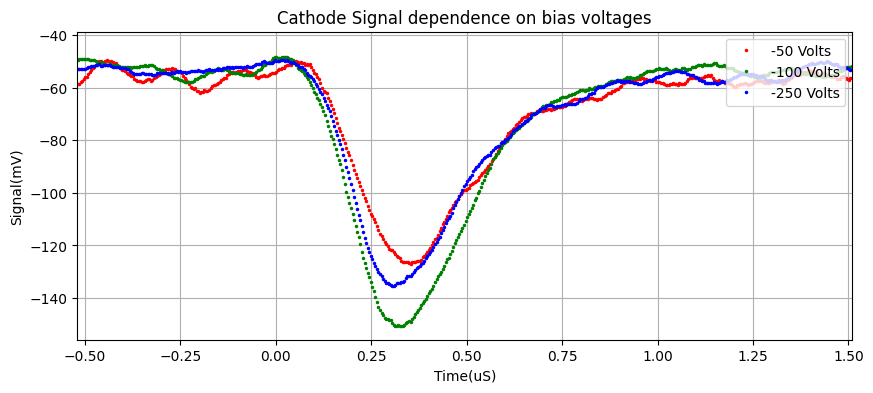

In [ ]:
fig, plots = plt.subplots(1, 1, figsize=(10,4))


color= ["Red","Green", "Blue"]
shape= ['x',"o","."]
i=0
for DF in DF_235.iterrows():
    #print(DF[1])
    # label="Trigger\n Cathode V \n %s"%(DF[1]["Voltages"][0]), label="Shaper"
    PickOff_popt, Pickoff_pcov= curve_fit(gaus,np.array(DF[1]["Time"]),np.array(DF[1]["Pickoff"] )/100)  

    PickOff_x = np.array(DF[1]["Time"])
    Pickoff_fity=gaus(PickOff_x,PickOff_popt[0],PickOff_popt[1],PickOff_popt[2])

    #if i==0:
        #plt.errorbar(x=PickOff_x,y=Pickoff_fity,label="Fit")
    #print(PickOff_popt[0],PickOff_popt[1])

    #fit_range_low  = int(np.floor((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*0.9))
    #fit_range_high = int(np.ceil((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*1.001))
    fit_range_low  = np.where(DF[1]["Time"] >0.24)[0][0]
    fit_range_high = np.where(DF[1]["Time"] >0.37)[0][0]

    #print(fit_range_low,fit_range_high)
    #print(DF[1]["Time"][fit_range_low],DF[1]["Time"][fit_range_high])
    
    lowindex=np.where(DF[1]["Shaper"]  == min(DF[1]["Shaper"]))

    #print(np.array(DF[1]["Time"])[lowindex] )
    #              A, t0, Tau,  sigma, offset
    bounds_low =[-1000, 0,0.00001]#,0.0000001,-100]
    bounds_high=[1000,100,    100]#,        5,100]
    p0=[min(DF[1]["Shaper"]),                       #A
        np.array(DF[1]["Time"])[lowindex][0],       #t0
        0.01]#,                                       #tau
        #0.00001,                                    #sigma
        #np.average(DF[1]["Shaper"][:100])]          #offset
    
    print("fitting p0 " , p0)
    try:
        PickShaper_popt, PickShaper_pcov= curve_fit(gaus,np.array(DF[1]["Time"][fit_range_low:fit_range_high]) ,
                                                    np.array(DF[1]["Shaper"][fit_range_low:fit_range_high]) ,
                                                    p0=p0, bounds=(bounds_low,bounds_high)  )

        print("Fitting coef" ,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
        if len(PickShaper_pcov) >0:
            xfit=np.array(DF[1]["Time"][fit_range_low:fit_range_high]) 
            yfit=gaus(xfit,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
           # plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="-.")

        
        

    except ValueError:
        print("error")




    #plt.errorbar(x=np.array(DF[1]["Time"]),  y = np.array(DF[1]["Pickoff"] )/100, c=color[i],fmt="",ms=1, marker=shape[0] )
    #plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="--")

    xplot=np.array(DF[1]["Time"][0::1])
    yplot=np.array(DF[1]["Shaper"][0::1] )
    plt.errorbar(x=xplot,  y =yplot , ms=3,c=color[i], 
                 fmt=" ",marker=shape[2],label="-%s Volts"%(DF[1]["Cathode"]))








    i=i+1

  

plt.legend(loc="upper right",ncol=1)


plt.ylabel("Signal(mV)")
plt.xlabel("Time(uS)")
plt.xlim(-0.52,1.51)
plt.grid()


plt.title("Cathode Signal dependence on bias voltages")

In [ ]:
np.where(DF[1]["Shaper"]  == min(DF[1]["Shaper"]))

(array([2588], dtype=int64),)

In [ ]:
[i for i,x in enumerate(DF[1]["Shaper"]) if x == min(DF[1]["Shaper"])]

[2588]

(array([2588], dtype=int64),)

In [ ]:

st="-L23_5-C100-G0-A0"

st.find("L"),st.find("-",st.find("C"))

(1, 11)

In [44]:

waveform_date=20231102
waveform_path="./data/waveforms/%s/"%(str(waveform_date))

name=str(waveform_date)+"-L23_5-C50-C0-A0_"



In [45]:
wf_info=grab_waveform_avg(name)

if wf_info == 0:
    print("Issues")
else:
    Time=wf_info["Time"]
    Pickoff=wf_info["Pickoff"]
    PreAmp=wf_info["PreAmp"]
    Shaper=wf_info["Shaper"]




NameError: name 'grab_waveform_avg' is not defined

In [15]:
file_base

NameError: name 'file_base' is not defined

In [16]:


plt.errorbar(x=Time,y=Pickoff)
plt.errorbar(x=Time,y=PreAmp)
plt.errorbar(x=Time,y=Shaper)

NameError: name 'Time' is not defined

In [41]:
dir="./data/waveforms/20231102/20231102-L23_5-C50-C0-A0/20231102*"

file_list=glob.glob(dir)

for file in file_list:
    print(file)
    #file=file.replace("\\","/")
    newfile=file.replace("C0","G0")

    

    print("\t",newfile)
    os.rename(file, newfile)

fitting p0  [-135.49833508984372, 0.30895139222656187, 0.01]
Fitting coef -135.18276611824746 0.3147212846982149 0.16022204823038325
fitting p0  [-206.67517660156224, 0.33715018300781224, 0.01]
Fitting coef -206.58004928197715 0.3361840742925256 0.15550463338908713


Text(0.5, 1.0, 'Cathode Signal dependence on Laser Current')

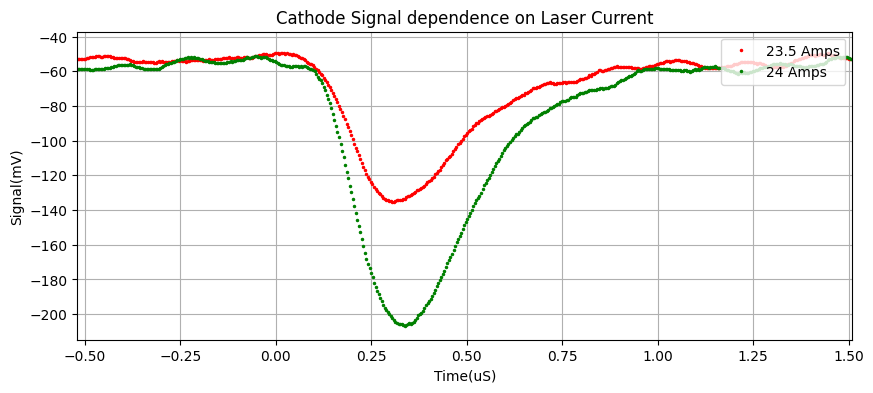

In [ ]:
fig, plots = plt.subplots(1, 1, figsize=(10,4))


color= ["Red","Green", "Blue"]
shape= ['x',"o","."]
i=0
for DF in DF_laser.iterrows():
    #print(DF[1])
    # label="Trigger\n Cathode V \n %s"%(DF[1]["Voltages"][0]), label="Shaper"
    PickOff_popt, Pickoff_pcov= curve_fit(gaus,np.array(DF[1]["Time"]),np.array(DF[1]["Pickoff"] )/100)  

    PickOff_x = np.array(DF[1]["Time"])
    Pickoff_fity=gaus(PickOff_x,PickOff_popt[0],PickOff_popt[1],PickOff_popt[2])

    #if i==0:
        #plt.errorbar(x=PickOff_x,y=Pickoff_fity,label="Fit")
    #print(PickOff_popt[0],PickOff_popt[1])

    #fit_range_low  = int(np.floor((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*0.9))
    #fit_range_high = int(np.ceil((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*1.001))
    fit_range_low  = np.where(DF[1]["Time"] >0.24)[0][0]
    fit_range_high = np.where(DF[1]["Time"] >0.37)[0][0]

    #print(fit_range_low,fit_range_high)
    #print(DF[1]["Time"][fit_range_low],DF[1]["Time"][fit_range_high])
    
    lowindex=np.where(DF[1]["Shaper"]  == min(DF[1]["Shaper"]))

    #print(np.array(DF[1]["Time"])[lowindex] )
    #              A, t0, Tau,  sigma, offset
    bounds_low =[-1000, 0,0.00001]#,0.0000001,-100]
    bounds_high=[1000,100,    100]#,        5,100]
    p0=[min(DF[1]["Shaper"]),                       #A
        np.array(DF[1]["Time"])[lowindex][0],       #t0
        0.01]#,                                       #tau
        #0.00001,                                    #sigma
        #np.average(DF[1]["Shaper"][:100])]          #offset
    
    print("fitting p0 " , p0)
    try:
        PickShaper_popt, PickShaper_pcov= curve_fit(gaus,np.array(DF[1]["Time"][fit_range_low:fit_range_high]) ,
                                                    np.array(DF[1]["Shaper"][fit_range_low:fit_range_high]) ,
                                                    p0=p0, bounds=(bounds_low,bounds_high)  )

        print("Fitting coef" ,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
        if len(PickShaper_pcov) >0:
            xfit=np.array(DF[1]["Time"][fit_range_low:fit_range_high]) 
            yfit=gaus(xfit,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
           # plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="-.")

        
        

    except ValueError:
        print("error")




    #plt.errorbar(x=np.array(DF[1]["Time"]),  y = np.array(DF[1]["Pickoff"] )/100, c=color[i],fmt="",ms=1, marker=shape[0] )
    #plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="--")

    xplot=np.array(DF[1]["Time"][0::1]) 
    yplot=np.array(DF[1]["Shaper"][0::1] ) 
    plt.errorbar(x=xplot,  y =yplot , ms=3,c=color[i], 
                 fmt=" ",marker=shape[2],label="%s Amps"%(DF[1]["LaserCur"]))








    i=i+1

  

plt.legend(loc="upper right",ncol=1)


plt.ylabel("Signal(mV)")
plt.xlabel("Time(uS)")
plt.xlim(-0.52,1.51)
plt.grid()


plt.title("Cathode Signal dependence on Laser Current")

In [3]:

waveform_date=20231110
waveform_path="./data/waveforms/%s"%(str(waveform_date))



def grab_waveform_avg(waveform_path):
    Runs=[]

    if 1==1:
        #print(waveform_path)
        dirlist = glob.glob(waveform_path+"/*")

        print(dirlist)

        for  dir in dirlist:
            print(dir)
            subname= dir.replace(waveform_path,"")
            delim="-"
            name_sep= subname.split(delim)
            print(name_sep)
          
            subname=subname.replace("\\","")
            subname=subname.replace(str(waveform_date),"")
            subname=subname.replace("%sL"%(delim),"L")
            

            if "noise" in dir:
                LaserCur=0
                Voltags=[0,0,0]
            else:    

                
                key="L"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                LaserCur=result[0] if len(result)>0  else 0
                #print(subname,result)


                key="C"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                CathPot=  result[0] if len(result)>0  else 0
                #print(subname,result)

                key="G"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                GridPot=  result[0] if len(result)>0  else 0

                key="A"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                AnodePot=  result[0] if len(result)>0  else 0

                #print("check" ,spec_loc,Apos_end)
                #print(stringtest[:Apos_end])
                #if AnodePos

                Voltags=[CathPot,GridPot,AnodePot]

                print("Voltages ", Voltags)
                print("Cur", LaserCur)

            

            #Build up file name from the base name and path
            subname=subname.replace("-n","n")
            #print(waveform_path)
            file_base=waveform_path+"/"+str(waveform_date)+delim +subname
            if subname.find("vac_uv")>=0:
                continue
            #print(file_base)
            file_list= glob.glob(file_base+"/*.csv")

            #print("list\n",file_list)
            #prepare list for each channel for every waveform
            waveforms=[]
            ChAs=[] 
            ChBs=[]
            ChCs=[]
            Times=[]
            #print(file_base)
            if len(file_list)<0:
                print("No files found")
                break
        #        return 0

            #Loop through each file(waveform) 
            print("Number of waveforms: ", len(file_list))
            for file in file_list:
                #print("/t",file)
                waveform=pd.read_csv(file,skiprows=[1,2])#Read in the csv info into datafram
                
                #Grab each column and build 2D array with time steps for each channel then appended through each waveform
                Times.append(np.array(waveform["Time"]))
                ChAs.append(np.array(waveform["Channel A"]))
                ChBs.append(np.array(waveform["Channel B"]))
                ChCs.append(np.array(waveform["Channel C"]))
                

                            
            #average each channel
            Time=np.average(Times, axis=0)
            ChA=np.average(ChAs, axis=0)*1000
            ChB=np.average(ChBs, axis=0)
            ChC=np.average(ChCs, axis=0)

            waveform_dict={}
            waveform_dict["Time"]=Time
            waveform_dict["Pickoff"]=ChA
            waveform_dict["PreAmp"]=ChB
            waveform_dict["Shaper"]=ChC

            waveform_dict["LaserCur"]=LaserCur
            waveform_dict["Cathode"]=int(Voltags[0])
            waveform_dict["Grid"]   =int(Voltags[1])
            waveform_dict["Anode"]  =int(Voltags[2])
            waveform_dict["Info"]   =name_sep[-2]+"-" +name_sep[-1]
 
        # print(waveform_dict["LaserCur"])
            Runs.append(waveform_dict)
        print(len(Runs))
    #    return waveform_dict


        return Runs



Get the Nov 10 data

In [4]:
waveform_date=20231110
waveform_path="./data/waveforms/%s"%(str(waveform_date))

Runs= grab_waveform_avg(waveform_path)


['./data/waveforms/20231110\\20231110-L25-C1000-G0-A100-anode', './data/waveforms/20231110\\20231110-L25-C250-G0-A100-anode', './data/waveforms/20231110\\20231110-L25-C500-G0-A100-anode', './data/waveforms/20231110\\20231110-noise']
./data/waveforms/20231110\20231110-L25-C1000-G0-A100-anode
['\\20231110', 'L25', 'C1000', 'G0', 'A100', 'anode']
Voltages  ['1000', '0', '100']
Cur 25
Number of waveforms:  1024
./data/waveforms/20231110\20231110-L25-C250-G0-A100-anode
['\\20231110', 'L25', 'C250', 'G0', 'A100', 'anode']
Voltages  ['250', '0', '100']
Cur 25
Number of waveforms:  1024
./data/waveforms/20231110\20231110-L25-C500-G0-A100-anode
['\\20231110', 'L25', 'C500', 'G0', 'A100', 'anode']
Voltages  ['500', '0', '100']
Cur 25
Number of waveforms:  988
./data/waveforms/20231110\20231110-noise
['\\20231110', 'noise']
Number of waveforms:  1024
4


In [12]:
name="./data/waveforms/20231116/20231116_L23_C1000_G0_A200_gas_anode/"
namelist=name.split("_")

key="C"
item =[ i for i in namelist if i.find(key) >= 0]
result=[ i.replace(key,"") for i in item ]
result[0]

'1000'

In [13]:
Runs

[{'Time': array([-4.99962617, -4.99562617, -4.99162617, ..., 44.99637241,
         45.00037241, 45.00437241]),
  'Pickoff': array([ 0.        ,  0.        ,  0.07749542, ..., -0.07749542,
         -0.07749542,  0.07749542]),
  'PreAmp': array([0.04211444, 0.04219235, 0.04192911, ..., 0.05360142, 0.05360214,
         0.05318421]),
  'Shaper': array([0.00286793, 0.00403006, 0.00306167, ..., 0.00751826, 0.0085257 ,
         0.00697534]),
  'LaserCur': '25',
  'Cathode': 1000,
  'Grid': 0,
  'Anode': 100,
  'Info': 'A100-anode'},
 {'Time': array([-4.99943119, -4.99543119, -4.99143119, ..., 44.9965674 ,
         45.0005674 , 45.0045674 ]),
  'Pickoff': array([ 0.15499084, -0.07749542,  0.07749542, ...,  0.        ,
          0.07749542,  0.15499084]),
  'PreAmp': array([0.04164904, 0.0417263 , 0.04180361, ..., 0.05086073, 0.05110901,
         0.05117047]),
  'Shaper': array([0.00403036, 0.00585151, 0.00623868, ..., 0.00619978, 0.00635477,
         0.00592855]),
  'LaserCur': '25',
  'Cathod

Make the nov10 data into DFs

In [5]:
DFs= pd.DataFrame.from_dict(Runs)
DFs=DFs.sort_values(by="Cathode")
DFs

,Time,Pickoff,PreAmp,Shaper,LaserCur,Cathode,Grid,Anode,Info
3,"[-4.999446484843693, -4.995446484843755, -4.99...","[0.0, 0.077495419921875, 0.0, 0.15499083984374...","[0.042409220947265576, 0.04194496930664057, 0....","[0.0006973076757812529, -1.5011718749134289e-0...",0,0,0,0,\20231110-noise
1,"[-4.999431185312452, -4.995431185312517, -4.99...","[0.15499083984375, -0.077495419921875, 0.07749...","[0.041649044658203085, 0.04172629970703123, 0....","[0.0040303639062499955, 0.005851506123046876, ...",25,250,0,100,A100-anode
2,"[-4.999615929423027, -4.99561592942309, -4.991...","[0.08031913967611336, 0.16063827935222671, 0.0...","[0.04263807138663966, 0.042974851417004044, 0....","[-0.000521451315789476, 0.00024158034412955382...",25,500,0,100,A100-anode
0,"[-4.999626172119082, -4.995626172119148, -4.99...","[0.0, 0.0, 0.077495419921875, 0.0, 0.232486259...","[0.042114437890624995, 0.04219235384765626, 0....","[0.0028679316113281225, 0.004030063398437492, ...",25,1000,0,100,A100-anode


KeyError: 0

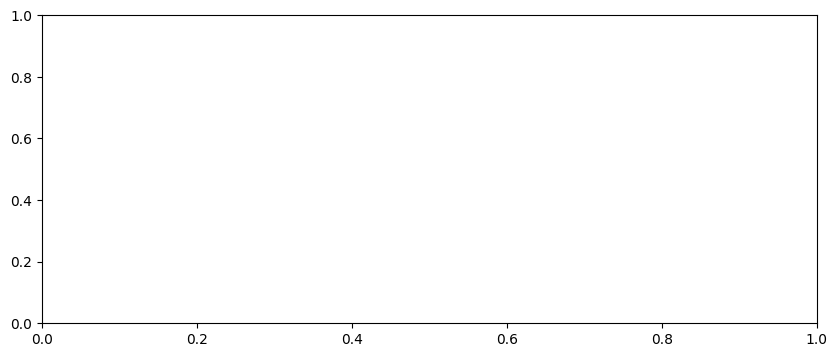

In [6]:

fig, plots = plt.subplots(1, 1, figsize=(10,4))


color= ["Red","Green", "Blue","cyan"]
shape= ['x',"o",".","+"]
i=0
for DF in DFs[1:].iterrows():
    
    newdf= pd.DataFrame(DF[1][['Time',"Pickoff","PreAmp","Shaper"]]).transpose()
    newdict={}
    newdict["Time"]=newdf["Time"][0]
    newdict["Pickoff"]=newdf["Pickoff"][0]
    newdict["PreAmp"]=newdf["PreAmp"][0]
    newdict["Shaper"]=newdf["Shaper"][0]

    newdf= pd.DataFrame.from_dict(newdict)

    samplesize=10
    resampledf = newdf.groupby(newdf.index // samplesize).mean()
    DF[1]=resampledf

    #print( type(DF[1]["LaserCur"]) ,DF[1]["LaserCur"]  == 26)
    #if int(DF[1]["LaserCur"]) !=28:
    #    continue
    #if DF[1]["Anode"] !=200:
    #    continue
    #if DF[1]["Info"] != "gas-anode":
    #    continue

    #print("made it",DF[1]["LaserCur"],DF[1]["Anode"])
    print(DF[1]["Info"])
    #print(DF[1])
    # label="Trigger\n Cathode V \n %s"%(DF[1]["Voltages"][0]), label="Shaper"
    PickOff_popt, Pickoff_pcov= curve_fit(gaus,np.array(DF[1]["Time"]),np.array(DF[1]["Pickoff"] )/100)  

    PickOff_x = np.array(DF[1]["Time"])
    Pickoff_fity=gaus(PickOff_x,PickOff_popt[0],PickOff_popt[1],PickOff_popt[2])

    #if i==0:
        #plt.errorbar(x=PickOff_x,y=Pickoff_fity,label="Fit")
    #print(PickOff_popt[0],PickOff_popt[1])

    #fit_range_low  = int(np.floor((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*0.9))
    #fit_range_high = int(np.ceil((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*1.001))
    fit_range_low  = np.where(DF[1]["Time"] >0.24)[0][0]
    fit_range_high = np.where(DF[1]["Time"] >0.37)[0][0]

    #print(fit_range_low,fit_range_high)
    #print(DF[1]["Time"][fit_range_low],DF[1]["Time"][fit_range_high])
    
    lowindex=np.where(DF[1]["Shaper"]  == min(DF[1]["Shaper"]))

    #print(np.array(DF[1]["Time"])[lowindex] )
    #              A, t0, Tau,  sigma, offset
    bounds_low =[-1000, 0,0.00001]#,0.0000001,-100]
    bounds_high=[1000,100,    100]#,        5,100]
    p0=[min(DF[1]["Shaper"]),                       #A
        np.array(DF[1]["Time"])[lowindex][0],       #t0
        0.01]#,                                       #tau
        #0.00001,                                    #sigma
        #np.average(DF[1]["Shaper"][:100])]          #offset
    
    print("fitting p0 " , p0)
    try:
        PickShaper_popt, PickShaper_pcov= curve_fit(gaus,np.array(DF[1]["Time"][fit_range_low:fit_range_high]) ,
                                                    np.array(DF[1]["Shaper"][fit_range_low:fit_range_high]) ,
                                                    p0=p0, bounds=(bounds_low,bounds_high)  )

        #print("Fitting coef" ,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
        if len(PickShaper_pcov) >0:
            xfit=np.array(DF[1]["Time"][fit_range_low:fit_range_high]) 
            yfit=gaus(xfit,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
           # plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="-.")
    except ValueError:
        print("error")
    #plt.errorbar(x=np.array(DF[1]["Time"]),  y = np.array(DF[1]["Pickoff"] )/100, c=color[i],fmt="",ms=1, marker=shape[0] )
    #plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="--")

    xplot=np.array(DF[1]["Time"][0::1])
    yplot=np.array(DF[1]["Shaper"][0::1])# + i*0.1)
    #plots[0].errorbar(x=xplot,  y =yplot , ms=3,#c=color[i], 
                 #fmt=" ",
                 #marker=shape[2],
    #)#label="-%s Amps"%(DF[1]["LaserCur"]))
    
    xplot=np.array(DF[1]["Time"][0::10])
    yplot=np.array(DF[1]["PreAmp"][0::10])# + i*0.01)
    plots.errorbar(x=xplot,  y =yplot , ms=3,#c=color[i], 
                 #fmt=" ",
                 #marker=shape[2],
                 label="-%s Volts"%(DF[1]["Cathode"]))

    i=i+1

  
#plots[0].legend(loc="upper right",ncol=1)
plt.legend(loc="upper right",ncol=1)


#plots[0].set_ylabel("Shaper \n Signal(mV)")
#plots[0].set_xlabel("Time(uS)")
#plt.xlim(-0.52,1.51)
#plots[0].grid()
plots.grid()
plots.set_ylabel("Preamp \n Signal(mV)")
plots.set_xlabel("Time(uS)")


plots.set_title("Anode Signal dependence on bias voltages")

In [16]:
newdf= pd.DataFrame(DF[1][['Time',"Pickoff","PreAmp","Shaper"]]).transpose()
newdict={}
newdict["Time"]=newdf["Time"][0]
newdict["Pickoff"]=newdf["Pickoff"][0]
newdict["PreAmp"]=newdf["PreAmp"][0]
newdict["Shaper"]=newdf["Shaper"][0]

newdf= pd.DataFrame.from_dict(newdict)

samplesize=10
resampledf = newdf.groupby(newdf.index // samplesize).mean()
resampledf

KeyError: 0

In [17]:
for i in DFs.iterrows():
    Noise=i
    break

In [18]:
np.diff(Noise[1]["Time"])

array([0.004, 0.004, 0.004, ..., 0.004, 0.004, 0.004])

c:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


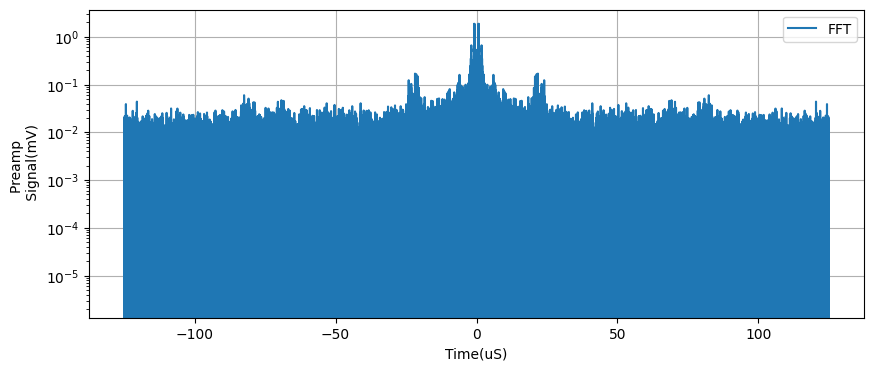

In [19]:
fig, plots = plt.subplots(1, 1, figsize=(10,4))



yp=np.diff(Noise[1]["PreAmp"],n=1)/np.diff(Noise[1]["Time"],n=1)

xp=Noise[1]["Time"][:-1:]
#print(len(yp),len(xp))

#plt.errorbar(x=xp,y=yp)

#plt.errorbar(x=Noise[1]["Time"],y=Noise[1]["PreAmp"],label="Preamp")


plt.errorbar(x=fftfreq(12502,0.004)[:12500],y=fft(Noise[1]["PreAmp"])[1:-1], label="FFT")

plots.legend()
plots.grid()
plots.set_ylabel("Preamp \n Signal(mV)")
plots.set_xlabel("Time(uS)")
plots.set_yscale("log")
#plots.set_ylim(-0.001,0.08)

In [24]:
def noise_sin(x,w=0,A=0,offset=0):
    return A * np.sin( x* 2 * np.pi*w + offset)

def noise_exp(x,w=0,A=0,offset=0):
    return A*np.exp(w*2.0*np.pi*np.abs(x)*1.j + offset)

def noise_sinexp(x,w=0,A=0,lam=0,offset=0):
    return A *np.exp(-lam*np.abs(x))*( np.sin( x* 2 * np.pi*w + offset) + np.cos( x* 2 * np.pi*w + offset) )


In [21]:
#fig, plots = plt.subplots(1, 1, figsize=(10,4))
noise_build=[]
mags=(1/N*np.abs(yplot))
count=0
w_old=-1000
for i,j in enumerate(mags[::1]):


    
    if j > 0.0033:

        if abs(w_old-xf[i]) < 110.5:
            continue

        noise_func = noise_sin(x,xf[i],j,0)
        
        if len(noise_build)==0:
            #noise_build=j*np.sin(2*np.pi*x*xf[i])
            #noise_build= noise_sin(x,xf[i],j,0)
            noise_build= noise_func

            
        else:
            print(j,xf[i])
            noise_build=noise_build+noise_func
            count=count+1
        w_old=xf[i]
#plt.errorbar(x=x,y=noise_build)
#plt.legend()

print(count)
#plt.xlim(12,14)

NameError: name 'N' is not defined

NameError: name 'x' is not defined

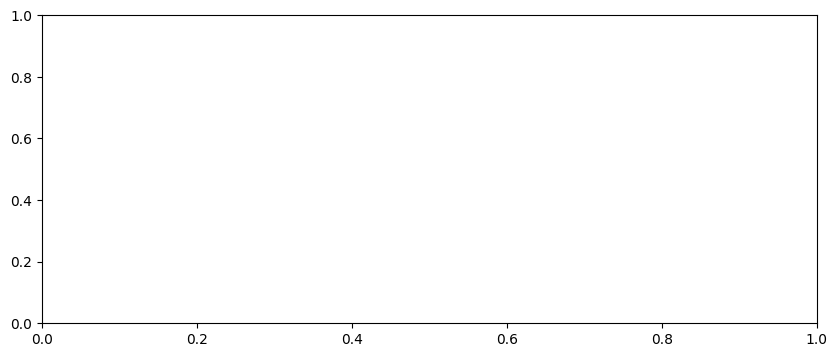

In [22]:
fig, plots = plt.subplots(1, 1, figsize=(10,4))
plt.errorbar(x=x[::],y=DFs.iloc[3]["PreAmp"][::],label="Raw")
plt.errorbar(x=x[::]-29,y=DFs.iloc[0]["PreAmp"][::],label="Raw")
#plt.errorbar(x=x[::],y=DFs.iloc[0]["PreAmp"][::]+0.009,label="Raw")
#plt.errorbar(x=DFs.iloc[0]["Time"], y= DFs.iloc[0]["PreAmp"]- noise_build/count,label="Subtracted" )
#plt.errorbar(x=x,y=noise_build,label="noise")


noise = noise_sin(x,10e6,0.002,1) + noise_sin(x,50e6,0.001,0.2)
plt.errorbar(x=x,y=noise)


#plt.ylim(-0.01,.01)

plt.legend()
plt.grid()

#### plot the drift time and drif velocity plots from nov10 data

In [7]:
njx=np.array([50,    100 ,200  ,300,400,501,750])
njy=np.array([0.9344,1.05,1.185,1.22,1.354,1.417,1.566])
njoya_y1=20/njy -0.1#np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
njoya_y=20/njy
njoya_y2=20/njy +0.1#np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1
njoya_x=njx*2

[0.049253840832472986, 0.042688243274795375, 23.59856800209502, 0]
5.198568522493358 31.598567776552635
0 [5.19856852 5.20856852 5.21856852 5.22856852 5.23856852] [3.35830177e-03 4.59707596e-02 2.07977291e+01 5.89358767e-01]
[0.048525348773133144, 0.04302545931558538, 20.398383348319637, 0]
5.198383778219635 31.59838303231174
1 [5.19838378 5.20838378 5.21838378 5.22838378 5.23838378] [3.36062785e-03 4.61457172e-02 1.87169072e+01 6.98272573e-01]
[0.050955063819365376, 0.04402143985320557, 17.598373184817973, 0]
5.198373535520506 31.598372789608888
2 [5.19837354 5.20837354 5.21837354 5.22837354 5.23837354] [4.24808919e-03 4.67919109e-02 1.65323649e+01 9.36579873e-01]


(10.1, 25.0)

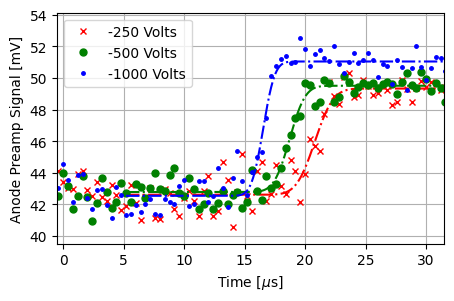

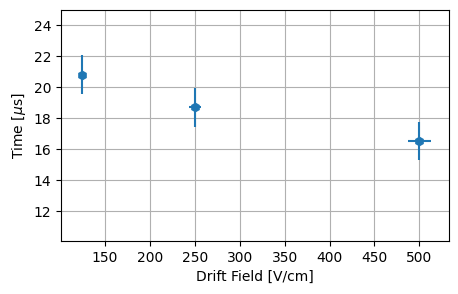

In [ ]:

fig, plots = plt.subplots(1, 1, figsize=(5,3))


color= ["Red","Green", "Blue","cyan"]
shape= ['x',"o",".","+"]
i=0
time_zs=[]
volts=[]
fit_pars=[]
for DF in DFs[1:].iterrows():
        #print(DF[1])

    newdf= pd.DataFrame(DF[1][['Time',"Pickoff","PreAmp","Shaper"]]).transpose()
    #print(newdf["Time"].index[0])
    j=newdf["Time"].index[0]

    newdict={}
    newdict["Time"]=newdf["Time"][j]
    newdict["Pickoff"]=newdf["Pickoff"][j]
    newdict["PreAmp"]=newdf["PreAmp"][j]
    newdict["Shaper"]=newdf["Shaper"][j]

    newdf= pd.DataFrame.from_dict(newdict)
    #print("newdf" ,len(newdf))
    samplesize=100
    resampledf = newdf.groupby(newdf.index // samplesize).mean()
    #print("sampled", len(resampledf))


    volts.append(DF[1]["Cathode"])
    
    
    xplot=np.array(resampledf["Time"][0::])
    yplot=np.array(resampledf["PreAmp"][0::] )
    plots.errorbar(x=xplot,  y =yplot*1000+ i*0.00 , ms=5,c=color[i], 
                 fmt=" ",
                 marker=shape[i],
                 label="-%s Volts"%(DF[1]["Cathode"]))


    x1=25
    x2=-35
    b=np.average(resampledf["PreAmp"][0:int(np.floor(len(resampledf["PreAmp"])/2))])
    a=np.average(resampledf["PreAmp"][int(np.floor(len(resampledf["PreAmp"])/2)):])
    z=xplot[np.where(resampledf["PreAmp"].diff(10)==resampledf["PreAmp"].diff(10).max())][0]
    f=0
    p0=[a,b,z,f]
    print(p0)


    print(xplot[x1],xplot[x2])
    ppot,pcov =curve_fit(errfunc  ,xplot[x1:x2],yplot[x1:x2],p0=p0)
    
    #print(pcov)
    fit_pars.append(ppot)
    time_zs.append(ppot[2])


    xfit=np.arange(xplot[x1],xplot[x2]+0.02,0.01)
    
    yfit=errfunc(xfit,ppot[0],ppot[1],ppot[2],ppot[3]) + i*0.00
    print(i,xfit[:5], ppot)


    plots.errorbar(x=xfit,  y =yfit*1000,c=color[i],fmt="-.")  

    i=i+1
    #print("\n")
    #break

  
#plots[0].legend(loc="upper right",ncol=1)
plt.legend(loc="upper left",ncol=1)


#plots[0].set_ylabel("Shaper \n Signal(mV)")
#plots[0].set_xlabel("Time(uS)")
plt.xlim(-0.52,31.51)
#plots[0].grid()
plots.grid()
plots.set_ylabel("Anode Preamp Signal [mV]")
plots.set_xlabel("Time [$\mu$s]")


#plots.set_title("Anode Signal dependence on bias voltages")

#fig2, plts2 = plt.subplots(1, 1, figsize=(10,6))
plt.subplots(figsize=(5,3))


err_cell_length=0.5 #+-mm
err_cathode_voltage=5 #volts
err_time_delay=1.25#us

err_drift_field_percent= np.sqrt( (err_cell_length/20)**2 + (err_cathode_voltage/np.array(volts))**2 ) 
err_drift_time_percent  = np.sqrt((err_time_delay/np.array(time_zs))**2 ) 

xerr= err_drift_field_percent
yerr= err_drift_time_percent

plt.errorbar(x=np.array(volts)/2.0,y=np.array(time_zs),xerr=xerr*np.array(volts)/2.0, yerr=yerr*np.array(time_zs),
marker="h",
fmt=" ", label="UMass Fall 23")




plt.xlabel("Drift Field [V/cm]")
plt.ylabel("Time [$\mu$s]")
plt.grid()
plt.ylim(10.1,25)



In [302]:
err_drift_field_percent,err_drift_vel_percent

(array([0.15831614, 0.15816447, 0.15812653]),
 array([0.15818697, 0.15820412, 0.15822954]))

In [14]:
fit_pars

[array([3.35830177e-03, 4.59707596e-02, 2.07977291e+01, 5.89358767e-01]),
 array([3.36062785e-03, 4.61457172e-02, 1.87169072e+01, 6.98272573e-01]),
 array([4.24808919e-03, 4.67919109e-02, 1.65323649e+01, 9.36579873e-01])]

In [63]:
Noise_sin= lambda x,A,w,phi : A*np.sin(w*x + phi)

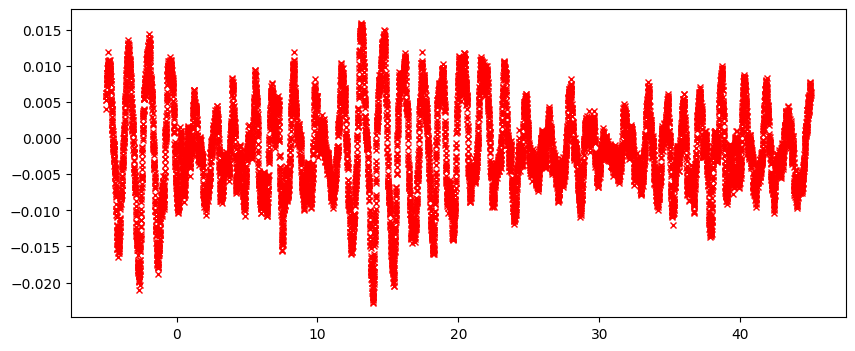

In [12]:
fig, plots = plt.subplots(1, 1, figsize=(10,4))


color= ["Red","Green", "Blue","cyan"]
shape= ['x',"o",".","+"]
i=0
time_zs=[]
volts=[]
for i,DF in enumerate(DFs[1:].iterrows()):
        #print(DF[1])

    newdf= pd.DataFrame(DF[1][['Time',"Pickoff","PreAmp","Shaper"]]).transpose()
    #print(newdf["Time"].index[0])
    j=newdf["Time"].index[0]

    newdict={}
    newdict["Time"]=newdf["Time"][j]
    newdict["Pickoff"]=newdf["Pickoff"][j]
    newdict["PreAmp"]=newdf["PreAmp"][j]
    newdict["Shaper"]=newdf["Shaper"][j]

    newdf= pd.DataFrame.from_dict(newdict)
    #print("newdf" ,len(newdf))
    samplesize=1
    resampledf = newdf.groupby(newdf.index // samplesize).mean()
    #print("sampled", len(resampledf))


    volts.append(DF[1]["Cathode"])
    
    
    xplot=np.array(resampledf["Time"][0::])
    yplot=np.array(resampledf["Shaper"][0::] )
    plots.errorbar(x=xplot,  y =yplot+ i*0.01 , ms=5,c=color[i], 
                 fmt=" ",
                 marker=shape[i],
                 label="-%s Volts"%(DF[1]["Cathode"]))
    

    break

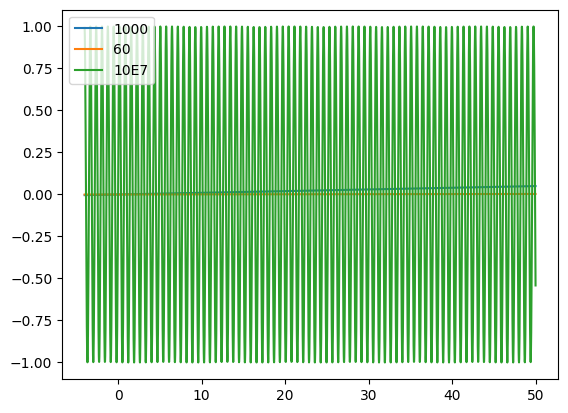

In [78]:
x=np.arange(-4,50,0.02)

y=Noise_sin(x*10**(-6),1,1000,0)
y1=Noise_sin(x*10**(-6),1,60,0)
y2=Noise_sin(x*10**(-6),1,9*10**6,0)

plt.plot(x,y,label="1000")
plt.plot(x,y1, label="60")
plt.plot(x,y2, label="10E7")

plt.legend()
#plt.plot(x,y1+y)#


In [73]:
signal=DF[1]["Shaper"]
time  =DF[1]["Time"]

samples = len(DF[1]["Shaper"])
duration = DF[1]["Time"][-1] - DF[1]["Time"][0]  
rate  =  samples/(duration * 10**(-6))

print(samples, duration, rate)


12502 50.00399858009813 250020005.49963754


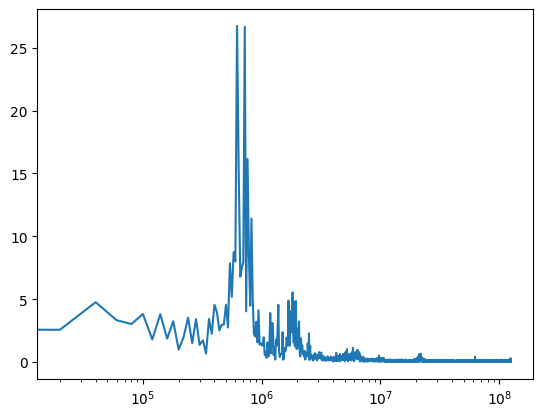

In [75]:
yf = rfft(signal)
xf = rfftfreq ( samples, 1/rate)

plt.plot(xf, np.abs(yf))

plt.xscale("log")

#plt.xlim(0,10500)